# Virtual Landmark

In [56]:
# import required modules
import matplotlib.pyplot as plt
import mediapipe as mp
import sys
import cv2
import os

# it is necessary to import module in dev mode without install the library 
sys.path.insert(0, os.path.abspath("../src"))

#import the elements of this library
from virtual_landmark import (
    get_extended_pose_landmarks_style,
    VirtualLandmark,
    landmark,
    calculus as calc,
    Connections,
)

## Virtual Landmark 

The `HelloWorld` class extends `VirtualLandmark` and defines a set of custom virtual landmarks used for biomechanical or structural analysis of the human body, based on MediaPipe pose landmarks.

Each method decorated with `@landmark` computes a new point as the midpoint between two existing landmarks. Additionally, each landmark declares its visual or logical connections to other landmarks, enabling improved visualization and structural modeling.


In [57]:
class HelloWorld(VirtualLandmark):
    
    @landmark("MIDDLE_SHOULDER", connection=["RIGHT_SHOULDER", "LEFT_SHOULDER", "NECK"])
    def _middle_shoulder(self):
        return calc.middle(
            self[self.virtual_landmark.RIGHT_SHOULDER],
            self[self.virtual_landmark.LEFT_SHOULDER],
        )

    @landmark("NECK", connection=["MIDDLE_SHOULDER", "NOSE"])
    def _neck(self):
        return calc.middle(
            self[self.virtual_landmark.NOSE],
            self[self.virtual_landmark.MIDDLE_SHOULDER],
        )

    @landmark("MIDDLE_HIP", connection=["MIDDLE_SHOULDER", "LEFT_HIP", "RIGHT_HIP"])
    def _middle_hip(self):
        return calc.middle(
            self[self.virtual_landmark.LEFT_HIP],
            self[self.virtual_landmark.RIGHT_HIP],
        )

    @landmark("LEFT_RIB", connection=["LEFT_SHOULDER", "LEFT_HIP"])
    def _left_rib(self):
        return calc.middle(
            self[self.virtual_landmark.LEFT_HIP],
            self[self.virtual_landmark.LEFT_SHOULDER],
        )

    @landmark("RIGHT_RIB", connection=["RIGHT_SHOULDER", "RIGHT_HIP"])
    def _right_rib(self):
        return calc.middle(
            self[self.virtual_landmark.RIGHT_HIP],
            self[self.virtual_landmark.RIGHT_SHOULDER],
        )

    @landmark("THORAX", connection=["RIGHT_RIB", "LEFT_RIB", "MIDDLE_SHOULDER", "MIDDLE_HIP"])
    def _thorax(self): 
        return calc.middle(
            self[self.virtual_landmark.RIGHT_RIB],
            self[self.virtual_landmark.LEFT_RIB],
        )

## Process Image

In [ ]:
# Initialize the MediaPipe Pose model for static image processing.
# - `static_image_mode=True` ensures that the pose detection runs on every frame (no temporal smoothing).
# - `model_complexity=2` selects the most accurate and computationally heavy model.
# - `enable_segmentation=False` disables the generation of segmentation masks, focusing only on pose landmarks.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False)

I0000 00:00:1743822843.001384 15494697 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4


In [59]:
image_path = "images/image-1.jpeg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [60]:
results = pose.process(image_rgb)

W0000 00:00:1743822843.064722 15525827 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743822843.090288 15525827 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


### Print images side by side

(-0.5, 2047.5, 2047.5, -0.5)

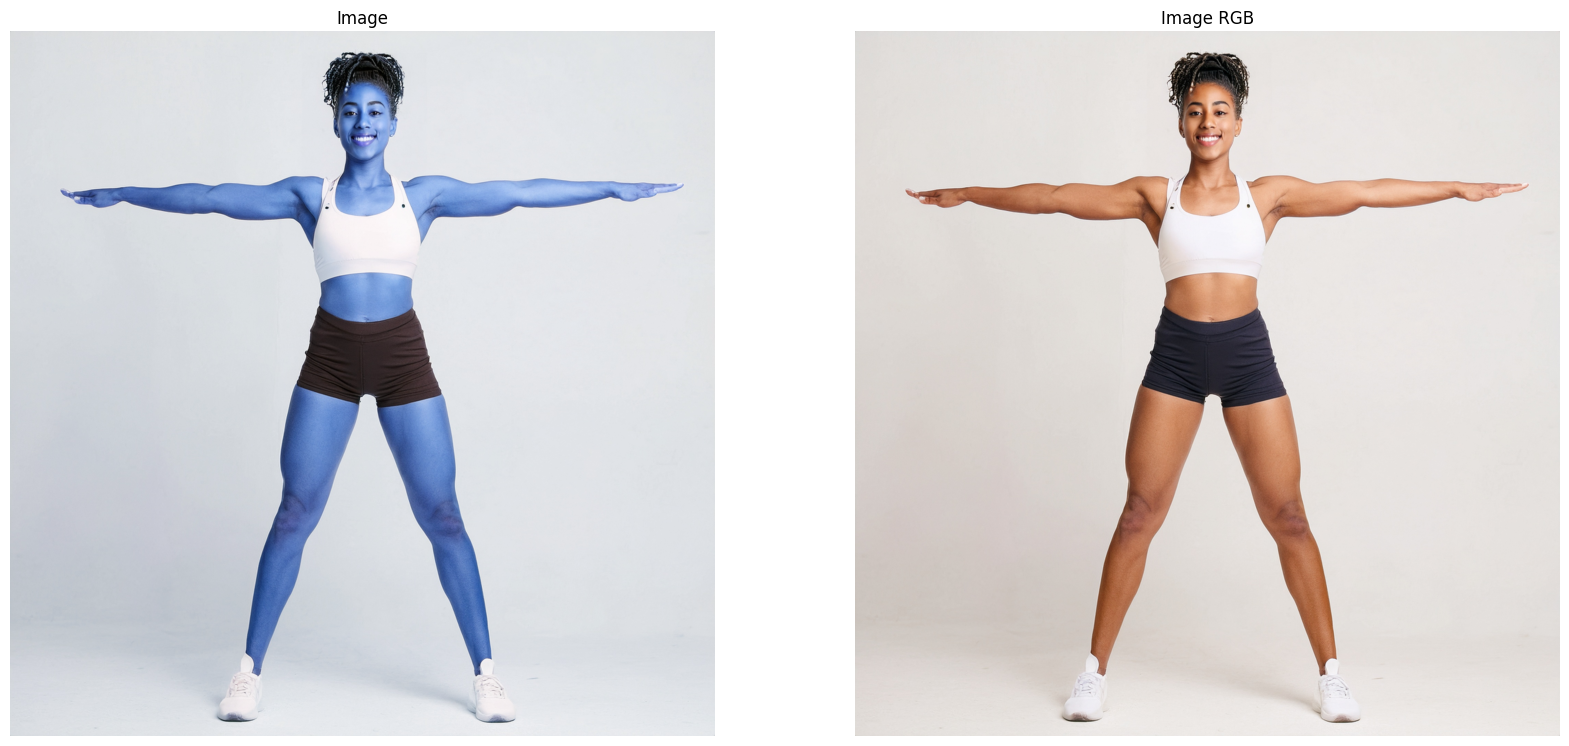

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(image)
axs[0].set_title("Image")
axs[0].axis("off")

axs[1].imshow(image_rgb)
axs[1].set_title("Image RGB")
axs[1].axis("off")

### Create virtual landmarks 

In [62]:
landmarks = HelloWorld(results.pose_landmarks.landmark)
connections = Connections(landmarks)

## Print Image with Landmakrs

In [63]:
mp_drawing = mp.solutions.drawing_utils

In [64]:
default_landmarks = image_rgb.copy()
virtual_landmarks = image_rgb.copy()
all_landmarks = image_rgb.copy()

In [65]:
color = (255,255,255)

In [66]:
mp_drawing.draw_landmarks(
    image=default_landmarks,
    landmark_list=landmarks.as_landmark_list(),  
    connections=connections.POSE_CONNECTIONS,  
    landmark_drawing_spec=get_extended_pose_landmarks_style(landmarks),
    connection_drawing_spec=mp_drawing.DrawingSpec(color=color, thickness=2),
)

In [67]:
mp_drawing.draw_landmarks(
    image=virtual_landmarks,
    landmark_list=landmarks.as_landmark_list(),  
    connections=connections.CUSTOM_CONNECTION,  
    landmark_drawing_spec=get_extended_pose_landmarks_style(landmarks),
    connection_drawing_spec=mp_drawing.DrawingSpec(color=color, thickness=2),
)

In [68]:
mp_drawing.draw_landmarks(
    image=all_landmarks,
    landmark_list=landmarks.as_landmark_list(),  
    connections=connections.ALL_CONNECTIONS,  
    landmark_drawing_spec=get_extended_pose_landmarks_style(landmarks),
    connection_drawing_spec=mp_drawing.DrawingSpec(color=color, thickness=2),
)

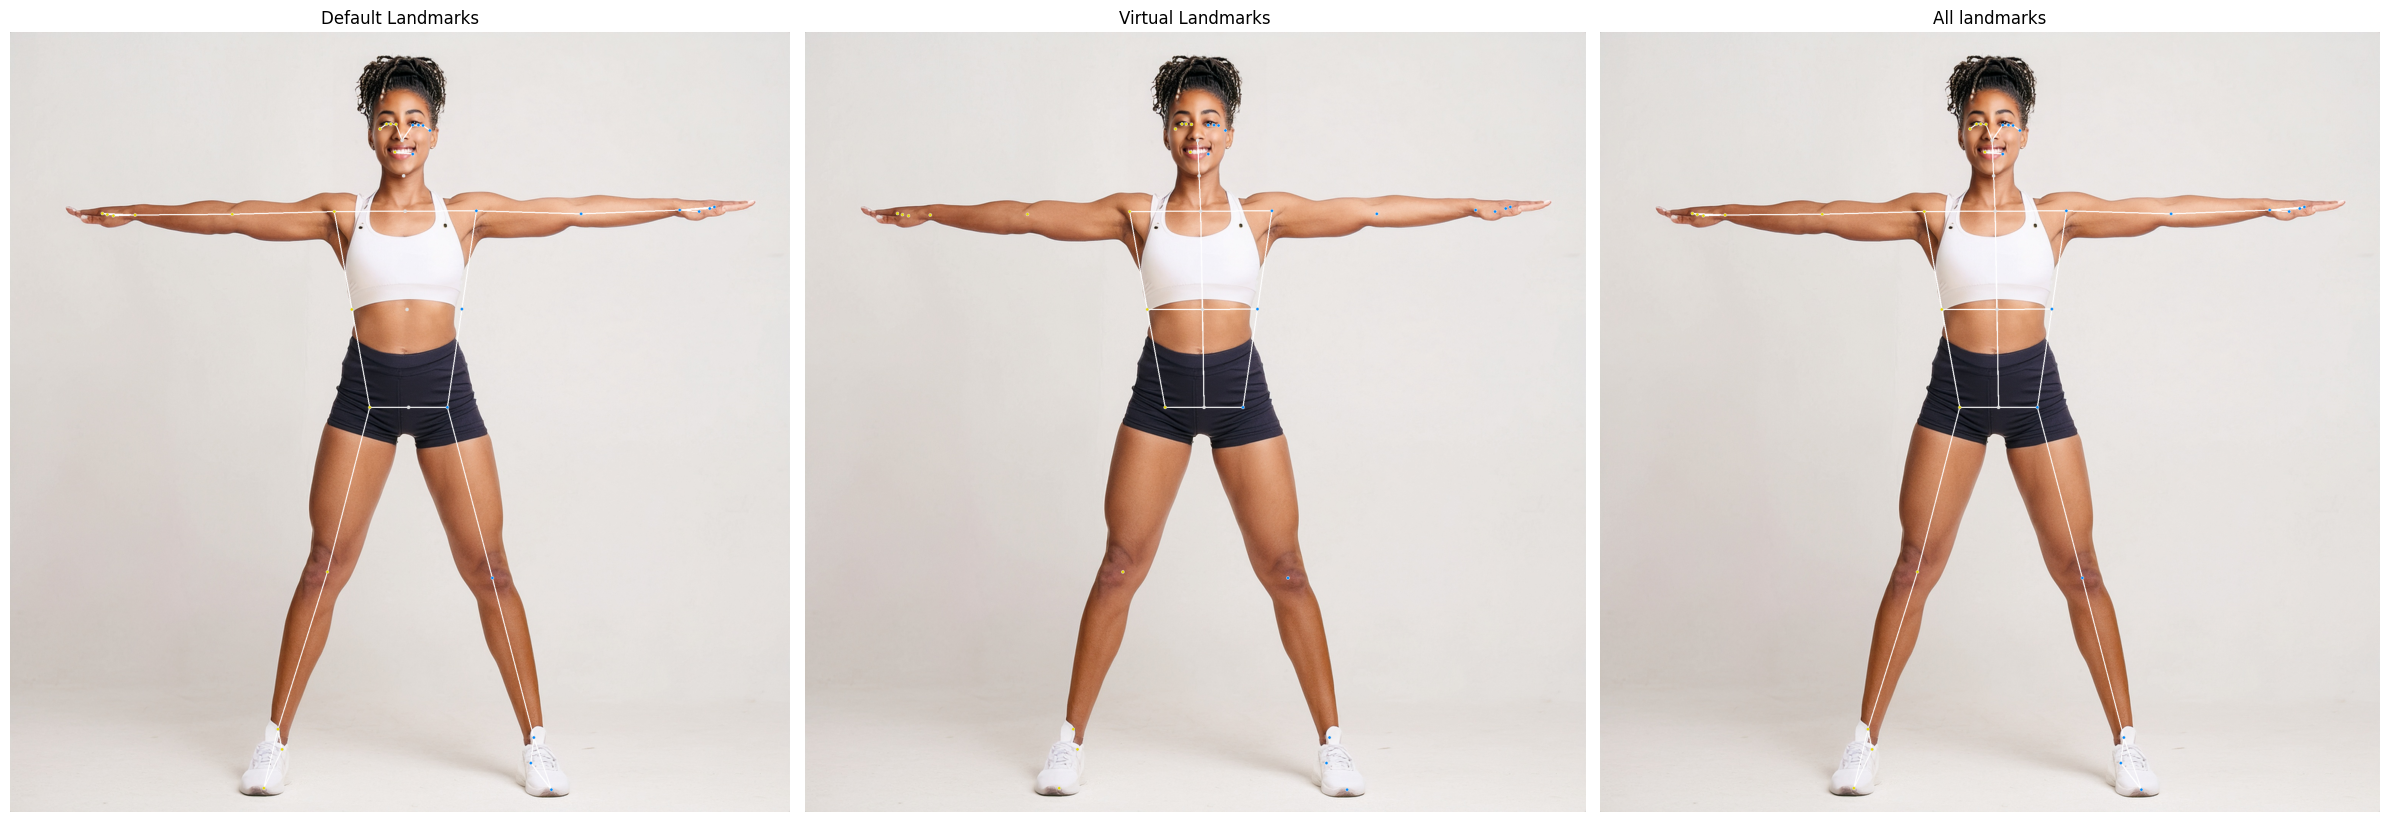

In [69]:
# Plotando as 3 imagens lado a lado
fig, axs = plt.subplots(1, 3, figsize=(24, 10))

axs[0].imshow(default_landmarks)
axs[0].set_title("Default Landmarks")
axs[0].axis("off")

axs[1].imshow(virtual_landmarks)
axs[1].set_title("Virtual Landmarks")
axs[1].axis("off")

axs[2].imshow(all_landmarks)
axs[2].set_title("All landmarks")
axs[2].axis("off")

plt.tight_layout()
plt.show()